In [1]:
import os, sys
%pylab inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Populating the interactive namespace from numpy and matplotlib


In [2]:
# read dataset
data = pd.read_csv('vgsales2021.csv')

In [3]:
#inspect data
print(data.shape)

(2000, 14)


In [4]:
print(data.columns)

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'Developer',
       'Critic_Score', 'User_Score', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales'],
      dtype='object')


In [6]:
print(data.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre           float64
Publisher        object
Developer        object
Critic_Score    float64
User_Score      float64
NA_Sales        float64
PAL_Sales       float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [7]:
# display dataset
data

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Tetris,Series,1984.0,NaN,Unknown,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Super Mario,Series,1983.0,NaN,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Pokemon,Series,1998.0,NaN,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Grand Theft Auto,Series,1998.0,NaN,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,FIFA,Series,1993.0,NaN,EA Sports,Extended Play Productions (1991-1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,"Monsters, Inc.",GBA,2001.0,NaN,THQ,Artificial Mind and Movement,NaN,NaN,0.59,0.95,0.03,0.10,1.67
1996,1997,Tony Hawk's Pro Skater 3,PS,2001.0,NaN,Activision,Neversoft,NaN,NaN,1.09,0.49,0.02,0.07,1.67
1997,1998,PGR: Project Gotham Racing 2,XB,2003.0,NaN,Microsoft Game Studios,Bizarre Creations,8.9,NaN,0.97,0.59,0.04,0.07,1.67
1998,1999,Destiny,PS3,2014.0,NaN,Activision,Bungie,NaN,NaN,0.69,0.59,0.13,0.26,1.67


### Find duplicates

In [13]:
data[data.duplicated(subset=['Name'],keep='first')]

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
8,9,Minecraft,All,2011.0,NaN,Mojang,Mojang AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,22,Wii Sports,Wii,2006.0,NaN,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
76,77,Terraria,All,2011.0,NaN,Re-Logic,Re-Logic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,83,Minecraft,PC,2010.0,NaN,Mojang,Mojang AB,10.0,NaN,NaN,NaN,NaN,NaN,NaN
95,96,Tetris,GB,1989.0,NaN,Nintendo,Bullet Proof Software,NaN,NaN,23.20,2.26,4.22,0.58,30.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1981,Saints Row 2,PS3,2008.0,NaN,THQ,Volition Inc.,7.9,NaN,0.88,0.54,0.02,0.24,1.68
1992,1993,Dragon Age: Origins,PS3,2009.0,NaN,Electronic Arts,BioWare Edmonton,8.7,NaN,0.96,0.42,0.08,0.21,1.67
1993,1994,Star Wars Battlefront II,XB,2005.0,NaN,LucasArts,Pandemic Studios,NaN,NaN,1.22,0.39,NaN,0.06,1.67
1996,1997,Tony Hawk's Pro Skater 3,PS,2001.0,NaN,Activision,Neversoft,NaN,NaN,1.09,0.49,0.02,0.07,1.67


In [14]:
col_names = data.columns
col_nunique = []
col_unique = []
for col in col_names:
    col_nunique.append(data[col].nunique())
    col_unique.append(data[col].unique())
    
features = pd.DataFrame({'Feature':col_names, 'Number of Categories': col_nunique, 'Categories': col_unique})

features

,Feature,Number of Categories,Categories
0,Rank,2000,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Name,1461,"[Tetris, Super Mario, Pokemon, Grand Theft Aut..."
2,Platform,30,"[Series, All, Wii, NES, PC, NS, GB, DS, X360, ..."
3,Year,43,"[1984.0, 1983.0, 1998.0, 1993.0, 2003.0, 1997...."
4,Genre,0,[nan]
5,Publisher,167,"[Unknown , Nintendo , Rockstar Games , EA S..."
6,Developer,517,"[Alexey Pajitnov , Nintendo , Game Freak , ..."
7,Critic_Score,56,"[nan, 7.7, 10.0, 8.2, 9.3, 8.0, 9.4, 9.1, 8.6,..."
8,User_Score,29,"[nan, 8.2, 9.1, 8.8, 8.1, 9.2, 4.5, 9.4, 9.7, ..."
9,NA_Sales,411,"[nan, 41.36, 29.08, 15.91, 5.05, 15.61, 11.27,..."


<AxesSubplot:xlabel='Global_Sales'>

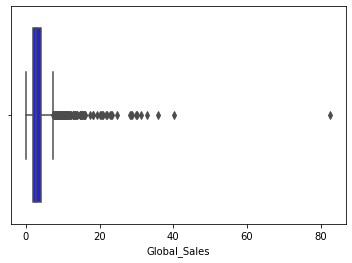

In [15]:
#boxplot of Global_Sales
sns.boxplot(x='Global_Sales', data=data, color='blue')

In [16]:
data.describe()

,Rank,Year,Genre,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
count,2000.000000,1592.000000,0.0,819.000000,106.000000,1201.000000,1235.000000,883.000000,1231.000000,1264.000000
mean,1000.500000,2006.070352,NaN,8.281197,8.927358,1.937286,1.196421,0.695583,0.377985,3.863528
std,577.494589,8.339365,NaN,1.045803,1.075753,2.449900,1.594539,1.092755,0.601971,4.549798
min,1.000000,1981.000000,NaN,2.600000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,500.750000,2001.000000,NaN,7.800000,8.700000,0.870000,0.420000,0.050000,0.105000,1.940000
50%,1000.500000,2007.000000,NaN,8.500000,9.100000,1.400000,0.820000,0.210000,0.230000,2.615000
75%,1500.250000,2012.000000,NaN,9.000000,9.500000,2.140000,1.415000,0.915000,0.430000,4.140000
max,2000.000000,2078.000000,NaN,10.000000,10.000000,41.360000,29.020000,10.220000,10.570000,82.650000


In [17]:
# copy the dataset
data_c = data.copy(deep = True)
data1 = data.copy(deep = True)

## Clean the data set

In [18]:
data.head(20)

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Tetris,Series,1984.0,NaN,Unknown,Alexey Pajitnov,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Super Mario,Series,1983.0,NaN,Nintendo,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Pokemon,Series,1998.0,NaN,Nintendo,Game Freak,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Grand Theft Auto,Series,1998.0,NaN,Rockstar Games,Rockstar North,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,FIFA,Series,1993.0,NaN,EA Sports,Extended Play Productions (1991-1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Call of Duty,Series,2003.0,NaN,Activision,Infinity Ward,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Lego,Series,1997.0,NaN,Mindscape,TT Fusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Minecraft,Series,2011.0,NaN,Mojang,Mojang,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Minecraft,All,2011.0,NaN,Mojang,Mojang AB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,The Sims,Series,2000.0,NaN,Electronic Arts,Maxis,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Remove NaN values

In [19]:
# all rows that have at least 1 NaN value
sum([True for idx,row in data1.iterrows() if any(row.isnull())])

2000

In [22]:
data1 = data_c.dropna(subset=['Global_Sales', 'Other_Sales', 'JP_Sales', 'PAL_Sales', 'NA_Sales'], thresh=5)

In [23]:
data1

,Rank,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
21,22,Wii Sports,Wii,2006.0,NaN,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
64,65,Super Mario Bros.,NES,1985.0,NaN,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
69,70,Mario Kart Wii,Wii,2008.0,NaN,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
81,82,Mario Kart 8 Deluxe,NS,2017.0,NaN,Nintendo,Nintendo EPD,9.3,NaN,5.05,4.98,2.11,0.91,13.05
83,84,Wii Sports Resort,Wii,2009.0,NaN,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,"Monsters, Inc.",GBA,2001.0,NaN,THQ,Artificial Mind and Movement,NaN,NaN,0.59,0.95,0.03,0.10,1.67
1996,1997,Tony Hawk's Pro Skater 3,PS,2001.0,NaN,Activision,Neversoft,NaN,NaN,1.09,0.49,0.02,0.07,1.67
1997,1998,PGR: Project Gotham Racing 2,XB,2003.0,NaN,Microsoft Game Studios,Bizarre Creations,8.9,NaN,0.97,0.59,0.04,0.07,1.67
1998,1999,Destiny,PS3,2014.0,NaN,Activision,Bungie,NaN,NaN,0.69,0.59,0.13,0.26,1.67


In [26]:
del data1['Rank']

In [27]:
data1.head()

,Name,Platform,Year,Genre,Publisher,Developer,Critic_Score,User_Score,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Global_Sales
21,Wii Sports,Wii,2006.0,NaN,Nintendo,Nintendo EAD,7.7,NaN,41.36,29.02,3.77,8.51,82.65
64,Super Mario Bros.,NES,1985.0,NaN,Nintendo,Nintendo EAD,10.0,8.2,29.08,3.58,6.81,0.77,40.24
69,Mario Kart Wii,Wii,2008.0,NaN,Nintendo,Nintendo EAD,8.2,9.1,15.91,12.92,3.80,3.35,35.98
81,Mario Kart 8 Deluxe,NS,2017.0,NaN,Nintendo,Nintendo EPD,9.3,NaN,5.05,4.98,2.11,0.91,13.05
83,Wii Sports Resort,Wii,2009.0,NaN,Nintendo,Nintendo EAD,8.0,8.8,15.61,10.99,3.29,3.02,32.90


In [28]:
data1.to_csv('vgsales2021_clean.csv')